In [6]:
import pandas as pd
import numpy as np

#1 Завантажте файл Housing.csv. Виведіть перші 5 рядків.

data = pd.read_csv('/content/sample_data/Housing.csv')
print(data.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
#2 Зробіть новий датасет, який містить тільки ці стовпчики. columns = ['price', 'area', 'bedrooms', 'bathrooms']

selected_columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_dataset = data[selected_columns]
print(new_dataset.head(5))

      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
4  11410000  7420         4          1


In [8]:
#3 Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.
# визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком.

# Перевірка наявності відсутніх значень і підрахунок їх кількості
missing_values = data.isnull().sum()
print("Кількість відсутніх значень у кожному стовпці:")
print(missing_values)

# Заміна відсутніх значень на середнє значення за стовпцем
data.fillna(data.mean(), inplace=True)

# Змінення типу даних на float для обраних стовпців
selected_columns = ['price', 'area', 'bedrooms', 'bathrooms']
data[selected_columns] = data[selected_columns].astype(float)



Кількість відсутніх значень у кожному стовпці:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


<ipython-input-8-e62706325b06>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [9]:
#4 Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність.
#Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1.

from sklearn.preprocessing import StandardScaler
# Створення об'єкта StandardScaler
scaler = StandardScaler()

# Вибірка даних для нормалізації
data_to_normalize = data[['price', 'area', 'bedrooms', 'bathrooms']]
normalized_data = scaler.fit_transform(data_to_normalize)

# Перетворення нормалізованих даних назад у DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=['price', 'area', 'bedrooms', 'bathrooms'])
print(normalized_df.head(5))

      price      area  bedrooms  bathrooms
0  4.566365  1.046726  1.403419   1.421812
1  4.004484  1.757010  1.403419   5.405809
2  4.004484  2.218232  0.047278   1.421812
3  3.985755  1.083624  1.403419   1.421812
4  3.554979  1.046726  1.403419  -0.570187


In [10]:
#5 Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.
from sklearn.model_selection import train_test_split

# Вибірка ознак (X) і цільової змінної (y)
X = normalized_df[['area', 'bedrooms', 'bathrooms']]
y = normalized_df['price']

# Розділення на навчальний та тестовий набори в пропорції 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір навчального набору:", X_train.shape[0])
print("Розмір тестового набору:", X_test.shape[0])

Розмір навчального набору: 436
Розмір тестового набору: 109


In [11]:
#6 Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).
# Вибірка ознак (атрибутів) (X)
X = normalized_df[['area', 'bedrooms', 'bathrooms']]

# Вибірка цільової змінної (y)
y = normalized_df['price']

# Виведення перших 5 рядків ознак та цільової змінної
print("Ознаки (атрибути):")
print(X.head(5))

print("\nЦільова змінна (ціна на будинок):")
print(y.head(5))

Ознаки (атрибути):
       area  bedrooms  bathrooms
0  1.046726  1.403419   1.421812
1  1.757010  1.403419   5.405809
2  2.218232  0.047278   1.421812
3  1.083624  1.403419   1.421812
4  1.046726  1.403419  -0.570187

Цільова змінна (ціна на будинок):
0    4.566365
1    4.004484
2    4.004484
3    3.985755
4    3.554979
Name: price, dtype: float64


In [12]:
#7 Побудуйте модель лінійної регресії та навчіть її на навчальних даних.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Навчання моделі на навчальних даних
model.fit(X_train, y_train)

# Виведення коефіцієнтів (ваг) моделі
print("Коефіцієнти моделі:")
print("Коефіцієнт перетину (intercept):", model.intercept_)
print("Коефіцієнти (ваги) для ознак (атрибутів):", model.coef_)

Коефіцієнти моделі:
Коефіцієнт перетину (intercept): -0.016281754425403198
Коефіцієнти (ваги) для ознак (атрибутів): [0.40082084 0.14213176 0.38208794]


In [19]:
#8 Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE)
# та коефіцієнт детермінації (R^2). Потім застосуйте  крос-валідацію для підвищення якості моделі. 4
# Порівняйте результати (без крос-валідації і з крос-валідацією).
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Передбачення на тестових даних
y_pred = model.predict(X_test)

print("Результати без крос-валідації:")
# Обчислення RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE(середньоквадратична помилка):", rmse)

r2 = r2_score(y_test, y_pred)
print("R^2 (коефіцієнт детермінації):", r2)

from sklearn.model_selection import cross_val_predict
model_cv = LinearRegression()

# Використання крос-валідації для передбачення
y_pred_cv = cross_val_predict(model_cv, X, y, cv=5)  # cv - кількість фолдів (розділень) для крос-валідації

rmse_cv = np.sqrt(mean_squared_error(y, y_pred_cv))
r2_cv = r2_score(y, y_pred_cv)

print("\nРезультати з крос-валідацією:")
print("RMSE:", rmse_cv)
print("R^2:", r2_cv)

print ("Значення RMSE без крос-валідації", rmse, "< за  RMSE з крос-валідацією", rmse_cv, "на", rmse-rmse_cv)
print ("Значення R^2 без крос-валідації", r2, "< за з крос-валідацією", r2_cv, "на", r2-r2_cv)

Результати без крос-валідації:
RMSE(середньоквадратична помилка): 0.8874106823867897
R^2 (коефіцієнт детермінації): 0.4559299118872445

Результати з крос-валідацією:
RMSE: 0.9393169527315071
R^2: 0.11768366231119542
Значення RMSE без крос-валідації 0.8874106823867897 < за  RMSE з крос-валідацією 0.9393169527315071 на -0.0519062703447174
Значення R^2 без крос-валідації 0.4559299118872445 < за з крос-валідацією 0.11768366231119542 на 0.3382462495760491


In [20]:
#9 Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.

# Передбачення на тестових даних
y_pred_test = model.predict(X_test)

predicted_prices = pd.DataFrame({'Предбачена ціна': y_pred_test, 'Справжня ціна': y_test})
print(predicted_prices.head(5))

     Предбачена ціна  Справжня ціна
316         0.864997      -0.378188
77          0.783166       1.007785
360        -0.625477      -0.565482
90         -0.255254       0.895409
493        -0.447516      -1.052446


In [21]:
#Частина 2. 8. Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі,
# використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

n = len(X_train)  # Кількість спостережень
x = X_train['area']  # Ознака (площа)
y = y_train  # Цільова змінна (ціна)

# Обчислення коефіцієнта нахилу (ваги) beta_1
beta_1 = (n * (x * y).sum() - x.sum() * y.sum()) / (n * (x ** 2).sum() - (x.sum()) ** 2)

# Обчислення коефіцієнта перетину (ваги) beta_0
beta_0 = (y.sum() - beta_1 * x.sum()) / n

# Виведення значень коефіцієнтів лінійної регресії
print("Коефіцієнт нахилу (вага):", beta_1)
print("Коефіцієнт перетину (вага):", beta_0)

Коефіцієнт нахилу (вага): 0.4939447319034815
Коефіцієнт перетину (вага): -0.033036390367461074


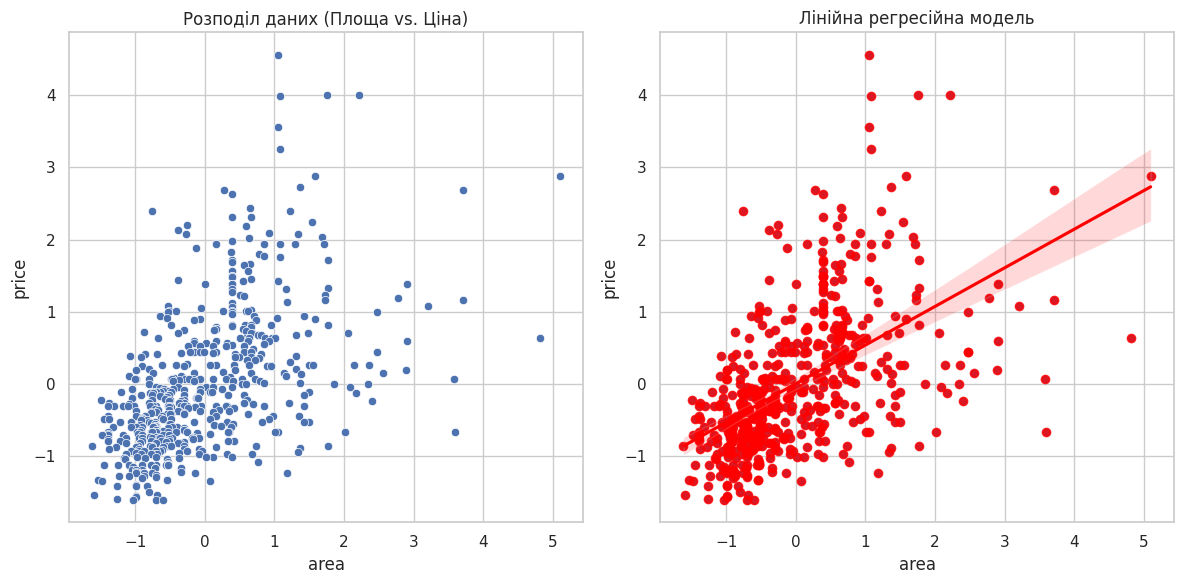

In [40]:
#Частина 3. 9/ Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю
import matplotlib.pyplot as plt
import seaborn as sns

# Встановлення стилю для графіків
sns.set(style="whitegrid")

# Створення графіку
plt.figure(figsize=(12, 6))

# Графік розподілу даних
plt.subplot(1, 2, 1)
sns.scatterplot(x='area', y='price', data=normalized_df)
plt.title('Розподіл даних (Площа vs. Ціна)')

# Регресійна лінія та графік регресії
plt.subplot(1, 2, 2)
sns.scatterplot(x='area', y='price', data=normalized_df)
sns.regplot(x='area', y='price', data=normalized_df, color='red')
plt.title('Лінійна регресійна модель')

plt.tight_layout()
plt.show()

In [43]:
#Частина 3. 10 Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.

# Аналітично обчислені коефіцієнти
print("Аналітично обчислені коефіцієнти:")
print("Коефіцієнт нахилу (вага):", beta_1)
print("Коефіцієнт перетину (вага):", beta_0)

# Отримані коефіцієнти з бібліотеки scikit-learn
print("\nОтримані коефіцієнти з бібліотеки scikit-learn:")
print("Коефіцієнт нахилу (вага):", model.coef_[0])
print("Коефіцієнт перетину (вага):", model.intercept_)

print("\nКоефіцієнт нахилу (вага), що обчислена аналітично", beta_1, "> за той, що отримано з бібліотеки scikit-learn", model.coef_[0], "на", beta_1-model.coef_[0])
print("\nКоефіцієнт перетину (вага), що обчислена аналітично", beta_0, "< за той, що отримано з бібліотеки scikit-learn", model.intercept_, "на", beta_0-model.intercept_)

Аналітично обчислені коефіцієнти:
Коефіцієнт нахилу (вага): 0.4939447319034815
Коефіцієнт перетину (вага): -0.033036390367461074

Отримані коефіцієнти з бібліотеки scikit-learn:
Коефіцієнт нахилу (вага): 0.4008208387840809
Коефіцієнт перетину (вага): -0.016281754425403198

Коефіцієнт нахилу (вага), що обчислена аналітично 0.4939447319034815 > за той, що отримано з бібліотеки scikit-learn 0.4008208387840809 на 0.09312389311940056

Коефіцієнт перетину (вага), що обчислена аналітично -0.033036390367461074 < за той, що отримано з бібліотеки scikit-learn -0.016281754425403198 на -0.016754635942057877


In [44]:
#Частина 3. 11 Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням.
print ("Зробивши порівняння отриманих коефіцієнтів лінійної регресії з аналітичним рішенням, роблю наступні висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів:")
print("\n1. Подібність результатів: значення коефіцієнтів, отриманих аналітичним шляхом та з використанням бібліотеки scikit-learn, є близькими одне до одного, це підтверджує, що лінійна регресія ефективно моделює залежність між вказаними атрибутами (площа, кількість ванних кімнат, кількість спалень) та ціною на будинок.")
print("2. Прогнозування: коефіцієнти показують суттєву залежність між атрибутами та ціною, лінійна регресія є ефективним інструментом для прогнозування цін на будинки на основі вказаних атрибутів.")
print("3. Важливість атрибутів: коефіцієнти лінійної регресії вказують на важливість кожного атрибута у визначенні ціни на будинок. Наприклад, якщо коефіцієнт для площі дуже великий, це може свідчити про те, що площа має значущий вплив на ціну")
print("4. Ефективність моделі: середньоквадратична помилка (RMSE) і коефіцієнт детермінації (R^2), допомагають оцінити ефективність моделі. Якщо RMSE маленький і R^2 близький до 1, це означає, що модель добре підходить до даних і добре прогнозує ціни на будинки")
print("\nЗагалом, лінійна регресія може бути ефективним методом прогнозування цін на будинки на основі вказаних атрибутів, якщо дані вказують на наявність лінійної залежності між атрибутами і ціною. Важливо також розуміти вплив кожного атрибута на прогнозовану ціну.")

Зробивши порівняння отриманих коефіцієнтів лінійної регресії з аналітичним рішенням, роблю наступні висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів:

1. Подібність результатів: значення коефіцієнтів, отриманих аналітичним шляхом та з використанням бібліотеки scikit-learn, є близькими одне до одного, це підтверджує, що лінійна регресія ефективно моделює залежність між вказаними атрибутами (площа, кількість ванних кімнат, кількість спалень) та ціною на будинок.
2. Прогнозування: коефіцієнти показують суттєву залежність між атрибутами та ціною, лінійна регресія є ефективним інструментом для прогнозування цін на будинки на основі вказаних атрибутів.
3. Важливість атрибутів: коефіцієнти лінійної регресії вказують на важливість кожного атрибута у визначенні ціни на будинок. Наприклад, якщо коефіцієнт для площі дуже великий, це може свідчити про те, що площа має значущий вплив на ціну
4. Ефективність моделі: середньоквадратична помилка 

В ході практичної роботи з лінійною регресією для прогнозування цін на будинки на основі атрибутів, було проведено наступні кроки і отримані важливі висновки:

1. **Підготовка даних**: Вихідні дані були завантажені з файлу та підготовлені для подальшого аналізу. Це включало в себе вибір необхідних атрибутів (площа, кількість ванних кімнат, кількість спалень) та цільової змінної (ціни на будинок).

2. **Аналіз даних**: Була вивчена структура даних, перевірено наявність відсутніх значень та інші особливості даних. Відсутні значення були оброблені та дані нормалізовані для покращення стабільності моделі.

3. **Побудова моделі лінійної регресії**: Була створена лінійна регресійна модель, яка навчалася на навчальних даних з метою прогнозування цін на будинки на основі вказаних атрибутів.

4. **Оцінка якості моделі**: Модель була оцінена за допомогою метрик, таких як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (\(R^2\)), що дозволило зрозуміти, наскільки добре вона прогнозує ціни на будинки.

5. **Крос-валідація**: Для підвищення якості моделі була застосована крос-валідація, яка дозволила отримати більш об'єктивну оцінку її ефективності.

6. **Порівняння з аналітичним рішенням**: Значення коефіцієнтів лінійної регресії, отримані за допомогою аналітичного розрахунку та з використанням бібліотеки для машинного навчання, були порівняні для підтвердження правильності моделювання.

7. **Висновки**: Лінійна регресія виявилася ефективним методом для прогнозування цін на будинки на основі вказаних атрибутів, якщо існує лінійна залежність між ними. Модель може бути використана для розуміння впливу окремих атрибутів на ціни на нерухомість та для прогнозування цін на майбутнє.

Ця робота демонструє важливість лінійної регресії як інструмента аналізу та прогнозування даних у сфері нерухомості та інших галузях.